# **Steps are Same as explained into the notebook where i implement this method with the Random Forest Algorithm see my notebook for the REF.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install img2vec-pytorch
!pip install pillow
!pip install scikit-learn
import os
import pickle

from img2vec_pytorch import Img2Vec
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the Img2Vec model
img2vec = Img2Vec()

data_dir = '/content/drive/MyDrive/weather_dataset'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

data = {}
for j, dir_ in enumerate([train_dir, val_dir]):
    features = []
    labels = []
    for category in os.listdir(dir_):
        for img_path in os.listdir(os.path.join(dir_, category)):
            img_path_ = os.path.join(dir_, category, img_path)
            img = Image.open(img_path_)

            # Ensure the image is in RGB format
            img = img.convert('RGB')

            img_features = img2vec.get_vec(img)

            features.append(img_features)
            labels.append(category)

    data[['training_data', 'validation_data'][j]] = features
    data[['training_labels', 'validation_labels'][j]] = labels

# Train model with KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(data['training_data'], data['training_labels'])

# Test performance
y_pred = knn.predict(data['validation_data'])
score = accuracy_score(y_pred, data['validation_labels'])

print("Accuracy:", score)

# Save the model
with open('/content/drive/MyDrive/weather_dataset/knn_model.p', 'wb') as f:
    pickle.dump(knn, f)


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 143MB/s]


Accuracy: 0.9459459459459459


In [ ]:
import os
import pickle
from img2vec_pytorch import Img2Vec
from PIL import Image

# Load the trained KNN model
with open('/content/drive/MyDrive/weather_dataset/knn_model.p', 'rb') as f:
    knn_model = pickle.load(f)

# Initialize the Img2Vec model
img2vec = Img2Vec()

def predict_weather(image_path):
    # Open the image
    img = Image.open(image_path)

    # Ensure the image is in RGB format
    img = img.convert('RGB')

    # Convert the image to a vector
    img_vector = img2vec.get_vec(img)

    # Reshape the vector to match the model's expected input
    img_vector = img_vector.reshape(1, -1)

    # Predict the label using the KNN model
    prediction = knn_model.predict(img_vector)

    return prediction[0]

# Example usage
new_image_path = '/content/drive/MyDrive/weather_dataset/sun.jpg'
predicted_label = predict_weather(new_image_path)
print(f'The predicted weather condition is: {predicted_label}')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


The predicted weather condition is: Sunrise


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


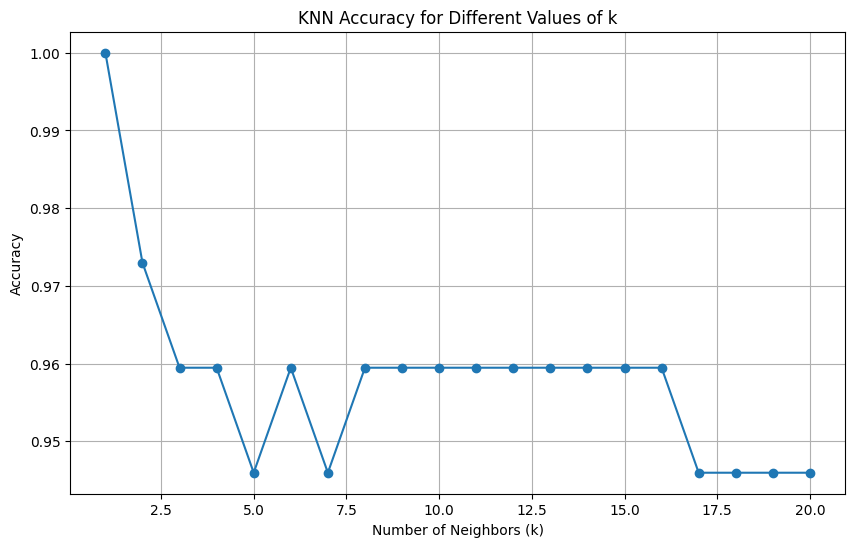

In [ ]:
import os
import pickle
import matplotlib.pyplot as plt

from img2vec_pytorch import Img2Vec
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the Img2Vec model
img2vec = Img2Vec()

data_dir = '/content/drive/MyDrive/weather_dataset'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')

data = {}
for j, dir_ in enumerate([train_dir, val_dir]):
    features = []
    labels = []
    for category in os.listdir(dir_):
        for img_path in os.listdir(os.path.join(dir_, category)):
            img_path_ = os.path.join(dir_, category, img_path)
            img = Image.open(img_path_)

            # Ensure the image is in RGB format
            img = img.convert('RGB')

            img_features = img2vec.get_vec(img)

            features.append(img_features)
            labels.append(category)

    data[['training_data', 'validation_data'][j]] = features
    data[['training_labels', 'validation_labels'][j]] = labels

# Initialize variables to store results
k_values = list(range(1, 21))  # Testing k values from 1 to 20
accuracies = []

# Train and evaluate the model for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data['training_data'], data['training_labels'])

    y_pred = knn.predict(data['validation_data'])
    score = accuracy_score(y_pred, data['validation_labels'])

    accuracies.append(score)

# Plot the accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Save the best model (the one with the highest accuracy)
best_k = k_values[accuracies.index(max(accuracies))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(data['training_data'], data['training_labels'])

with open('./best_knn_model.p', 'wb') as f:
    pickle.dump(best_knn, f)
